<a href="https://colab.research.google.com/github/neSTORY/Deeplearning_Zero_to_All/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Classification
- Exam: pass or fail
- Sapm: Not Sapm or Spam
- Face: Real or Fake
- Tumor: Not Malignant or Malignant

image.png

- Logistic : 분류, 라벨이 분류가 가능함(0 or 1)
- Linear : 라벨이 연속적인 데이터(수치형)

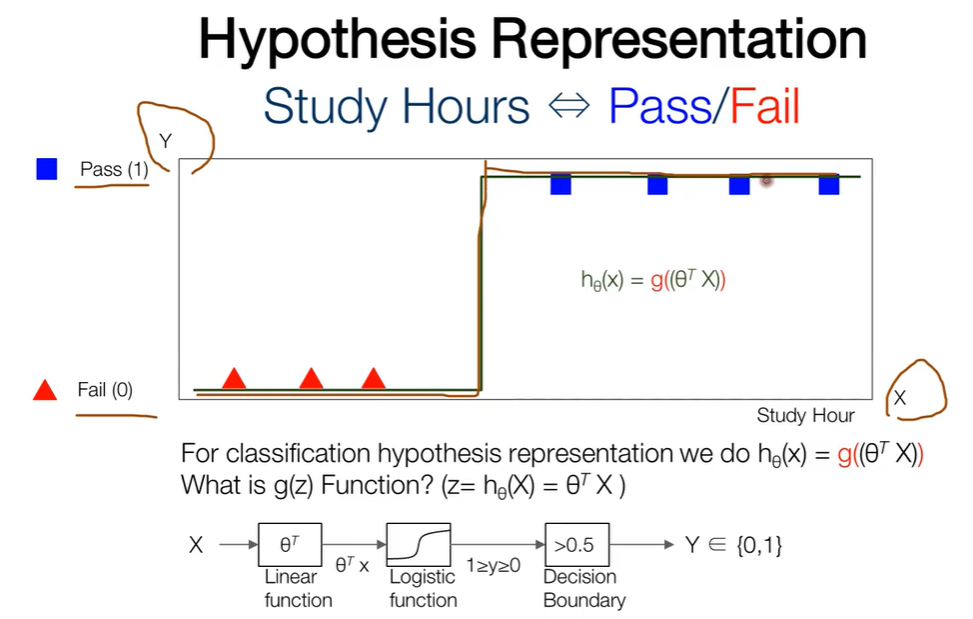

선형 회귀에서 hypothesis인 h(x) = ax를 g()라는 함수안에 넣어서 회귀를 분류로 바꿔줄 수 있음

image.png

g(z) 함수는 활성화 함수인 sigmoid로 z가 양의 무한대로 가면 1로 수렴하고 음의 무한대로 가면 0으로 수렴하는 결과를 가져다 줌

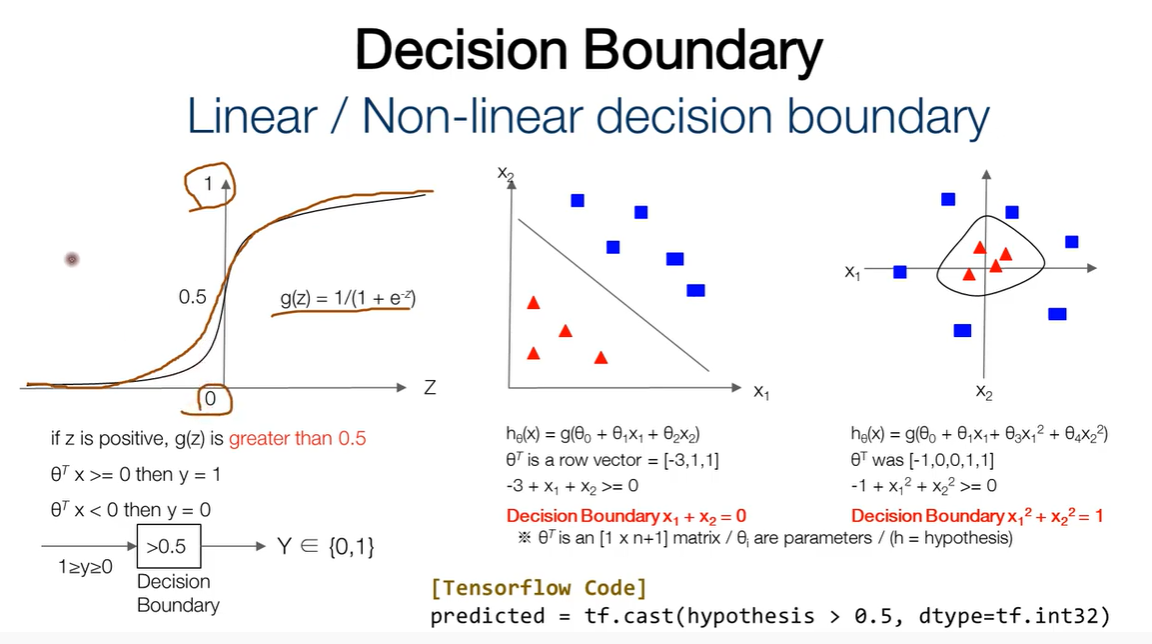

경계값을 0.5를 기준으로 y의 값이 0.5보다 크면 1로 작으면 0으로 분류할 수 있음

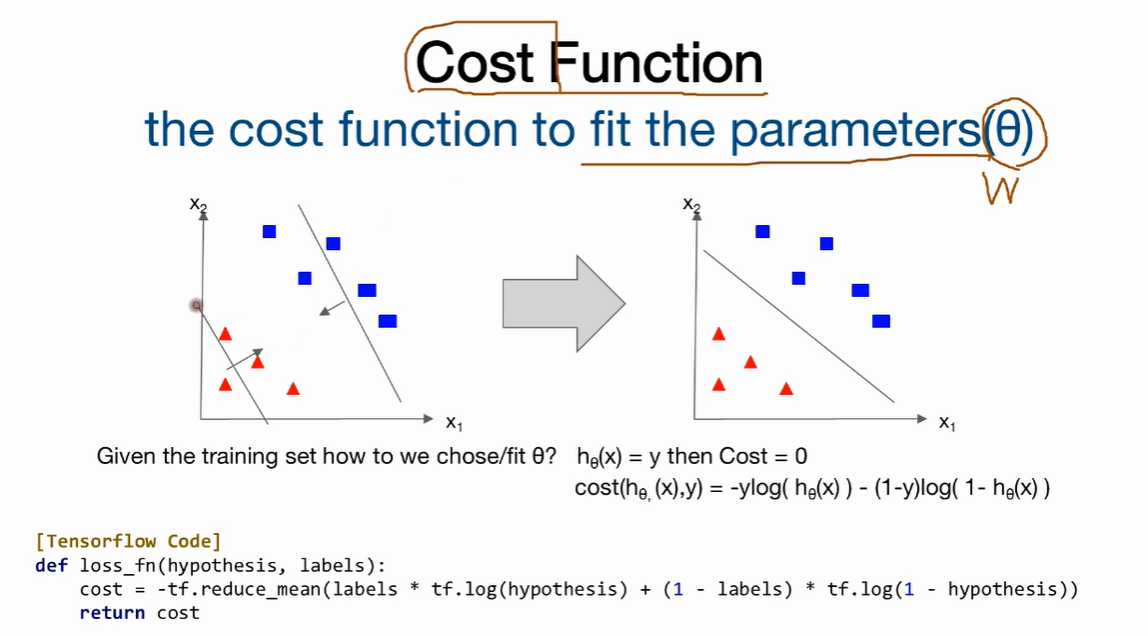

첫 번째 그림에서 2개의 직선은 분류를 잘 못해주고 있다. 두 번째 그림의 경계선 처럼 되어야 이상적인 경계선이므로 두 번째 그림의 경계선과 첫 번째 그림의 경계선들의 차이가 로지스틱 회귀에서의 cost값이다.

image.png

시그모이드는 0 ~ 1의 값을 리턴해주는 반면 우리는 0 or 1인 구분된 값을 원한다. 그래서 시그모이드 그래프에서 우리가 원하는 형태의 그래프를 빼보면 구불구불한 형태의 그래프가 나오게 된다. 그래서 cost값을 그래프로 그려보면 왼쪽 그림과 같이 나온다.

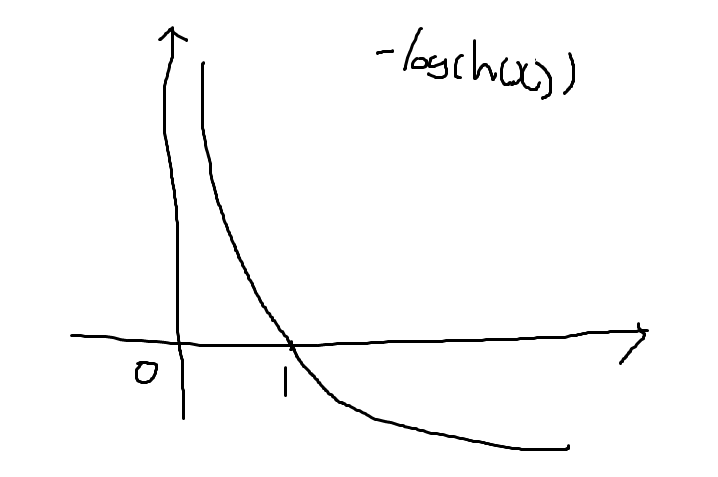

Cost 함수를 보면 만약 라벨이(정답) 1이면 cost함수는 -log(h(x))로 위 그림을 보면 -log(h(x))함수는 우리의 예측값이 정답과 같은 1이면 cost가 0 예측값이 0이면 cost값은 무한대로 커지게 된다. <br>
마찬가지로 라벨이 0이면 -log(1-h(x))로 예측값이 0이면 cost는 0, 예측값이 1이면 cost는 무한대로 커지게 된다.<br>

위의 두 조건(라벨이 1인 경우, 0인 경우)를 합친 cost함수는 `-y*log(h(x)) - (1-y)log(1-h(x))로 나오게 된다.`

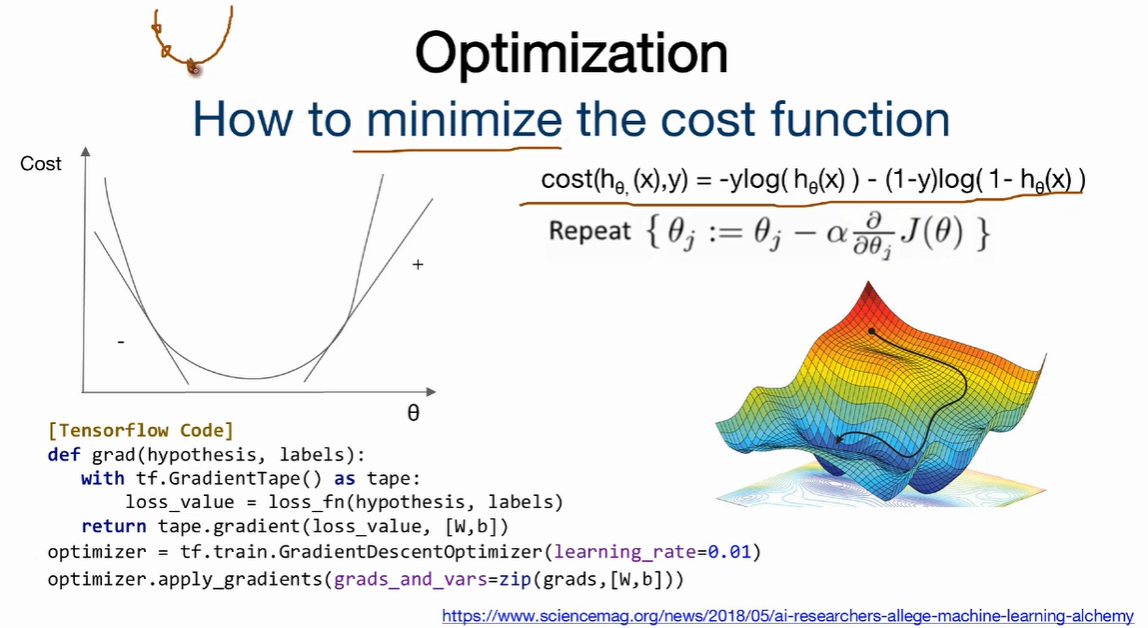

선형회귀와 마찬가지로 cost 값을 최소화하기 위해서는 cost 함수를 미분한 것에 learning rate를 곱하여 가중치를 업데이트 해야 한다.

In [ ]:
% tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
# Logistic Regression Code

import tensorflow as tf
import tensorflow.contrib.eager as tfe
tf.enable_eager_execution()

In [ ]:
x_train = [[1., 2.],
           [2., 3.],
           [3., 1.],
           [4., 3.],
           [5., 3.],
           [6., 2.]]

y_train = [[0.],
           [0.],
           [0.],
           [1.],
           [1.],
           [1.]]

x_test = [[5., 2.]]
y_test = [[1.]]

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))
# tf.data.Dataset : tensorflow에서 데이터셋을 만들기 위한 모듈
# from_tensor_slices : 로드된 데이터를 이용하여 데이터셋을 만들어 줌(여기선 x_train, y_train)
# batch : x_train의 길이(6)만큼 배치 사이즈를 정해줌

W = tf.Variable(tf.zeros([2,1]), name = "weights")
b = tf.Variable(tf.zeros([1]), name = "bias")

In [ ]:
def logistic_regression(features):
  hypothesis = tf.div(1., 1. + tf.exp(tf.matmul(features, W) + b))
  # tf.exp : 요소를 지수의 제곱으로(ex. tf.exp(tf.constant(2.)) -> e**2)
  # hypothesis 정의는 1/ 1+e**h(x)로 sigmoid를 표현한 것이다.
  return hypothesis

def loss_fn(features, labels):
  hypothesis = logistic_regression(features)
  cost = -tf.reduce_mean(labels * tf.log(hypothesis) + (1-labels) * tf.log(1-hypothesis))
  return cost

def grad(features, labels):
  with tf.GradientTape() as tape:
    cost = loss_fn(features, labels)
  return tape.gradient(cost, [W,b])

optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-2)

In [ ]:
# def grad(features,labels):
#    with tf.GradientTape() as tape:
#       loss_value = loss_fn(logistic_regression(features),labels)
#    return tape.gradient(loss_value,[W,b])

In [ ]:
EPOCHS = 1001
for step in range(EPOCHS):
  for features, labels in tfe.Iterator(dataset):
    grads = grad(features, labels)
    optimizer.apply_gradients(grads_and_vars=zip(grads, [W,b]))
    if step % 100 == 0:
      print("Iter: {}, Loss: {:4f}".format(step, loss_fn(features, labels)))

def accuracy_fn(hypothesis, labels):
  predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
  # tf.cast(조건) : 조건을 만족하면 1, 아니면 0
  accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
  return accuracy, predicted

test_acc = accuracy_fn(logistic_regression(x_test), y_test)
print(test_acc)

Iter: 0, Loss: 0.349443
Iter: 100, Loss: 0.344050
Iter: 200, Loss: 0.338798
Iter: 300, Loss: 0.333681
Iter: 400, Loss: 0.328694
Iter: 500, Loss: 0.323833
Iter: 600, Loss: 0.319092
Iter: 700, Loss: 0.314468
Iter: 800, Loss: 0.309957
Iter: 900, Loss: 0.305556
Iter: 1000, Loss: 0.301261
(<tf.Tensor: id=578690, shape=(), dtype=float32, numpy=1.0>, <tf.Tensor: id=578685, shape=(1, 1), dtype=float32, numpy=array([[1.]], dtype=float32)>)


In [ ]:
tf.cast(logistic_regression(x_test), dtype=tf.float32)

<tf.Tensor: id=578761, shape=(1, 1), dtype=float32, numpy=array([[0.88714415]], dtype=float32)>

In [ ]:
loss_fn(x_data, y_data)

<tf.Tensor: id=302, shape=(), dtype=float32, numpy=0.6931472>

## Multinomial Classification

image.png

성적을 A,B,C로 나눠주는 분류기가 필요하다고 가정하면 이중 분류와 달리 기준이 3개가 필요하다.
- A인지 아닌지
- B인지 아닌지
- C인지 아닌지


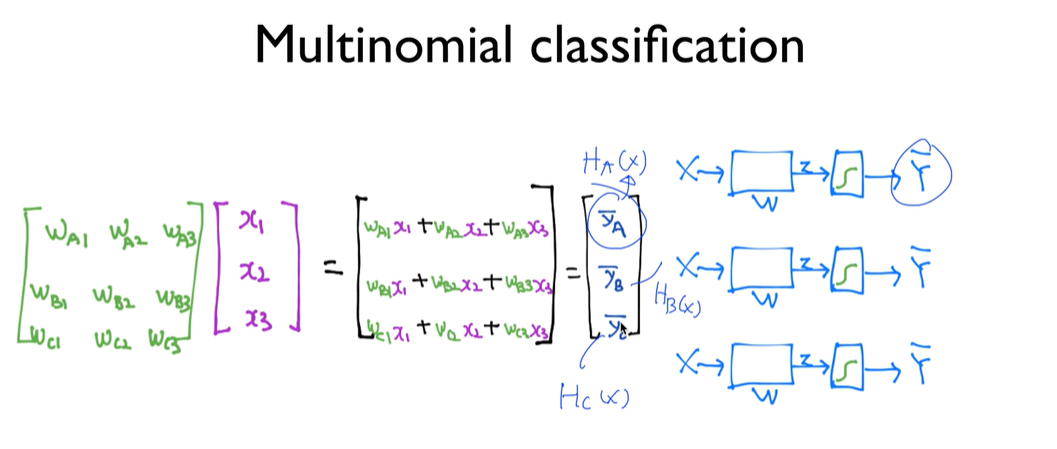

A,B,C를 구분하는 분류기가 필요하다 할 때 가중치 W를 행렬로 표현하면 위의 그림과 같다.

행렬 W와 x를 점곱하여 나온 결과 (3,1)은 각각 A분류기, B분류기, C분류기의 결과로 나온다.

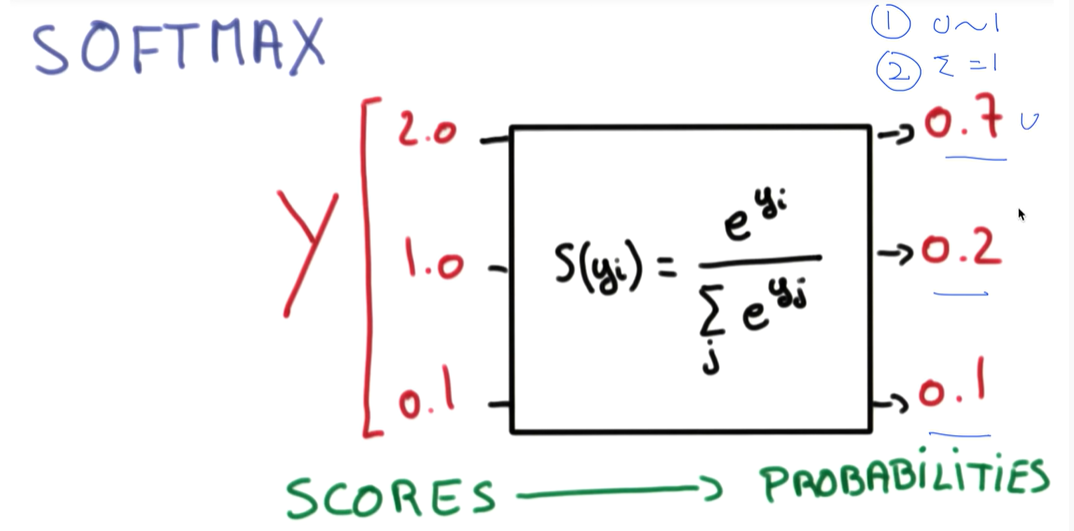

그런데 원하는 출력값의 형태를
1. 0 ~ 1 사이의 값
2. 출력값들의 합이 1

으로 만들기 위해서 활성화 함수를 거치게 된다.

image.png

- 이렇게 되면 출력값들을 확률로 볼 수 있게 된다.
- 이 확률을 다시 가장 큰 값을 1 나머지는 0으로 바꿔준다.

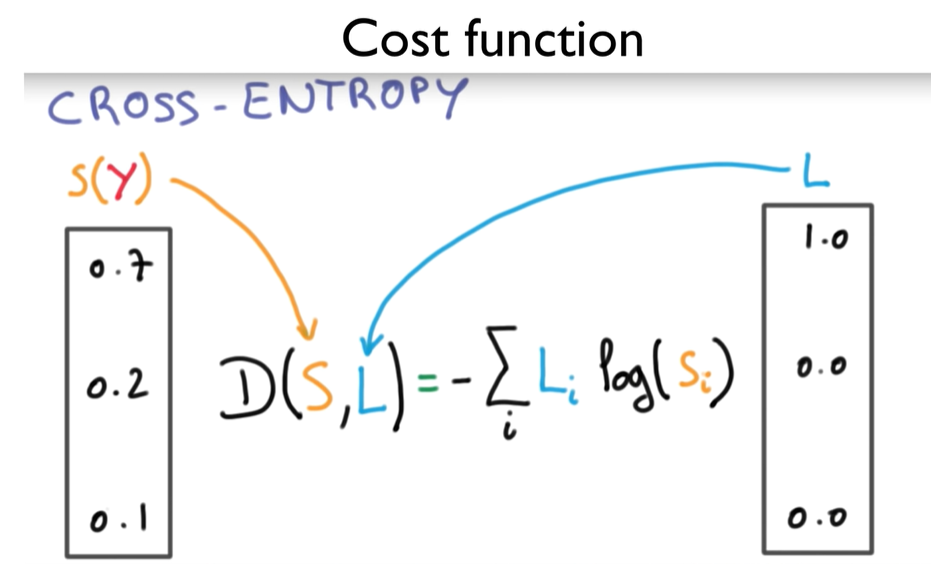

cost를 구하는 식은 위 그림과 같다.<br>
D(S,L)에서 S는 출력값이 활성화 함수를 거쳐 나온 결과들, L은 라벨이다.

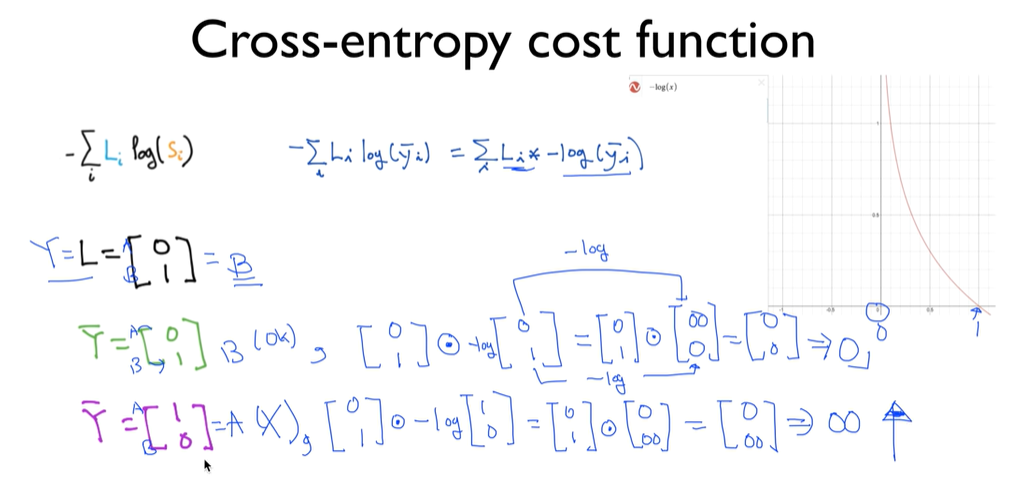

자, 그러면 라벨이 B([0,1])이고 예측결과가 맞은 경우, 틀린 경우에 cost값을 구하는 과정을 보자

- 맞은 경우 : Li *(요소 곱-행렬곱x,주의) - log(yhati)
  <br>이 경우에는 yhat의 첫 요소는 -log0 이므로 무한대, 두 번째 요소는 -log1로 0이 나오게 된다.
  <br>[0,1]과 요소 곱을 하면 0이 나와 cost값이 최소가 됐다.
- 틀린 경우 : 첫 번째 요소 -log1 => 0, 두번째 요소 -log0 => 무한대
  <br> [0,1]과 요소 곱을 하면 무한대가 나와서 cost값이 굉장히 크게 된다.

image.png

Logistic cost와 방금 배운 cross entrop cost의 식은 사실 같은 것 이다.(표현만 다를 뿐, 구조는 같음!)
<br>Why?
- H(x)는 0 ~ 1 사이의 값을 가지는 sigmoid를 거쳐 S와 같은 범위이다.
- 첫 번째 항의 y, 두 번째 항의 (1-y)는 라벨이 1인 경우, 0인 경우에 따라 switch 해주기 위한 요소이다. <br> 이는 크로스 엔트로피에서도 요소곱으로 진행했다.
